<a href="https://colab.research.google.com/github/polock11/bmw_used_cars_analysis/blob/main/bmw_used_car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries for loading dataset and machine learning

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

#Loading dataset

In [2]:
df = pd.read_csv('bmw.csv')
df.sample(10)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
6669,X4,2019,36390,Semi-Auto,8310,Diesel,42.8,2.0
6704,3 Series,2013,11511,Manual,68991,Diesel,58.9,2.0
10001,M2,2018,23495,Automatic,17000,Petrol,39.8,3.0
5458,X6,2020,58999,Semi-Auto,3,Petrol,26.4,3.0
395,5 Series,2017,21998,Semi-Auto,25260,Diesel,60.1,2.0
10480,1 Series,2016,11000,Manual,36615,Petrol,53.3,1.5
8977,4 Series,2016,13999,Manual,45253,Diesel,67.3,2.0
3571,3 Series,2016,11590,Automatic,86500,Diesel,70.6,2.0
7674,1 Series,2017,11990,Manual,12000,Diesel,72.4,1.5
3875,1 Series,2019,20440,Semi-Auto,9908,Petrol,47.9,2.0


#Analysis of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 673.9+ KB


In [ ]:
df.describe()

,year,price,mileage,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,470.800000,6.600000


In [3]:
#getting all categorical features 
object_feature = []

for col in df.columns:
    if df[col].dtypes == 'O':
        object_feature.append(col)

print(object_feature)

['model', 'transmission', 'fuelType']


#Separating numeric and target variables

In [4]:
#droping object variables with the target variable
X = df.drop(['model', 'transmission', 'fuelType', 'price'], axis = 1)
#sroting the target variable
y = df['price']

display(X.head())
display(y.head())

,year,mileage,mpg,engineSize
0,2014,67068,57.6,2.0
1,2018,14827,42.8,2.0
2,2016,62794,51.4,3.0
3,2017,26676,72.4,1.5
4,2014,39554,50.4,3.0


0    11200
1    27000
2    16000
3    12750
4    14500
Name: price, dtype: int64

#Splitting data for training and testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8624, 4) (2157, 4) (8624,) (2157,)


#Applying Liniear Regression

In [6]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#Predicting for the test set

In [10]:
y_pred = model.predict(X_test)

temp_df = pd.DataFrame({'actual_price': y_test,
                        'predicted_price': np.round(y_pred,2)})

temp_df.head(10)

,actual_price,predicted_price
8728,15300,16192.69
761,15495,11347.81
7209,39875,36923.41
6685,21730,22092.40
8548,13799,19530.33
9385,24499,14604.32
6085,42202,34702.92
1885,32400,27280.80
4921,28990,27190.79
1121,15790,22688.97


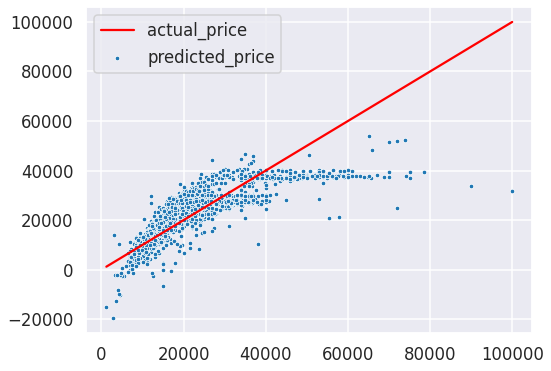

In [21]:
plt.figure(figsize = (8,6))
sns.set_style('darkgrid')
sns.set_context('talk')

sns.lineplot(x = 'actual_price', y = 'actual_price', data = temp_df, color = 'red', label = 'actual_price')
sns.scatterplot(x = 'actual_price', y = 'predicted_price', data = temp_df, marker = '.',label = 'predicted_price')
plt.legend()
plt.xlabel('')
plt.ylabel('')

plt.show()

#Different KPI's

In [ ]:
#mean_absolute_error
mae = np.round(mean_absolute_error(y_test, y_pred), 2)
print('Mean Absolute Error: '+ str(mae))

#mean_absolute_percentage_error
mape = np.round(mean_absolute_percentage_error(y_test, y_pred), 2)*100
print('Mean Absolute Percentage Error: '+ str(mape))

#mean_squared_error
mse = np.round(mean_squared_error(y_test, y_pred), 2)
print('Mean Squared Error: '+ str(mse))

#root_mean_squared_error
rmse = np.round(np.sqrt(mse),2)
print('Root Mean Squared Error: '+ str(rmse))

#r2_score
r2_error = np.round(r2_score(y_test, y_pred), 2)
print('R2_Score: '+ str(r2_error))

Mean Absolute Error: 4644.49
Mean Absolute Percentage Error: 23.0
Mean Squared Error: 46236600.68
Root Mean Squared Error: 6799.75
R2_Score: 0.64
